# 의학과 번외편

### Matplotlib에서 폰트 설정

In [19]:
import urllib
from matplotlib import font_manager
from matplotlib import pyplot as plt

font_path = 'NanumGothic.ttf'
with open(font_path, 'wb') as f: 
    f.write(urllib.request.urlopen("https://github.com/team-monolith-product/jupyter-nanum/raw/main/NanumGothic.ttf").read())

# 글꼴을 등록합니다.
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()

### [Step1] 데이터 로드

In [73]:
import pandas as pd

df = pd.read_csv('datasets/육군신체측정정보.csv')
df

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,2,2013,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,3,20140106,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,4,2013,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,5,20140106,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1
...,...,...,...,...,...,...,...,...,...,...
167975,167979,20170131,100.6,86.4,173.2,86.7 (34.1 in),77.1,56.9,27.1,73.7
167976,167980,20170131,97.9,82.7,166.3,90.5 (35.6 in),73.4,61.5,28.8,70.7
167977,167981,20170131,97.9,87.2,175.2,94.3 (37.1 in),83.1,57.1,27.6,78.7
167978,167982,20170131,85.3,86.8,173.6,75.9 (29.9 in),76.6,57.6,24.3,57.4


### [Step2] 데이터 파악하기

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167980 entries, 0 to 167979
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   순번          167980 non-null  int64  
 1   측정 일자       167980 non-null  int64  
 2   가슴 둘레 센티미터  167980 non-null  float64
 3   소매길이 센티미터   167980 non-null  float64
 4   신장 센티미터     167980 non-null  float64
 5   허리 둘레 센티미터  167980 non-null  object 
 6   샅높이 센티미터    167980 non-null  float64
 7   머리 둘레 센티미터  167980 non-null  float64
 8   발 길이 센티미터   167980 non-null  float64
 9   몸무게 킬로그램    167980 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 12.8+ MB


In [13]:
df.describe()

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
count,167980.000000,1.679800e+05,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000
mean,83991.205215,1.134763e+07,95.592957,87.307860,174.689987,79.339203,58.112691,26.833369,72.155234
std,48492.690523,9.997185e+06,9.186797,2.736999,5.448835,3.787552,9.819429,1.397705,13.741908
min,1.000000,2.013000e+03,74.900000,77.100000,153.600000,5.900000,52.000000,1.000000,0.000000
25%,41995.750000,2.013000e+03,88.800000,85.400000,170.900000,76.700000,56.700000,25.900000,62.100000
50%,83990.500000,2.014022e+07,94.500000,87.200000,174.600000,78.900000,58.000000,26.800000,70.200000
75%,125986.250000,2.016053e+07,101.300000,89.100000,178.300000,81.700000,59.400000,27.700000,80.200000
max,167983.000000,2.017013e+07,139.900000,99.600000,198.400000,103.700000,3998.000000,34.200000,135.000000


### [Step3] 데이터 정제하기

In [78]:
#일부 잘못된 데이터가 있을수도 있어 데이터를 정제합니다.
df = df[df['발 길이 센티미터'] > 10]  # 발길이 10센치 이상인 경우만 남깁니다.
df = df[df['몸무게 킬로그램'] > 30] # 몸무게 킬로그램이 30kg 이상인 경우만 남깁니다. 
df = df[100 > df['머리 둘레 센티미터']] # 머리 둘레 100cm 이상인 경우만 남깁니다. 
df = df[df['샅높이 센티미터'] > 50] # 샅 높이가 50cm 이상인 경우만 남깁니다. 
df.count()

순번            167952
측정 일자         167952
가슴 둘레 센티미터    167952
소매길이 센티미터     167952
신장 센티미터       167952
허리 둘레 센티미터    167952
샅높이 센티미터      167952
머리 둘레 센티미터    167952
발 길이 센티미터     167952
몸무게 킬로그램      167952
dtype: int64

### [Step3] 데이터 시각화하기

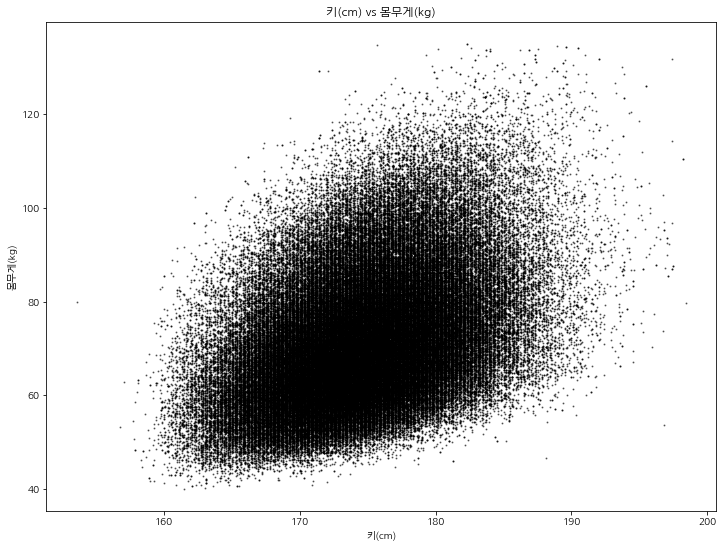

In [79]:
#키와 몸무게의 관계를 알아보기 위해, 산점도를 그려봅니다. 
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,9))
plt.scatter(df['신장 센티미터'], df['몸무게 킬로그램'], s = 1, alpha = 0.5, c = 'k')
plt.xlabel('키(cm)')
plt.ylabel('몸무게(kg)')
plt.title('키(cm) vs 몸무게(kg)')
plt.show()

### [Step4] 데이터형태 변형하기

In [80]:
#numpy를 통해 dataframe 형식을 array로 변환합니다. 
import numpy as np

X = np.array(df[['신장 센티미터']]) #신장 센티미터 열을 array로 전환
Y = np.array(df[['몸무게 킬로그램']]) #몸무게 킬로그램 열을 array로 전환

print(X.shape, Y.shape)

(167952, 1) (167952, 1)


### [Step5] 모델 구성 및 학습하기

In [81]:
from sklearn.linear_model import LinearRegression

height = 180

X = X.reshape([-1,1])
reg = LinearRegression().fit(X,Y) # X와 Y의 관계를 선형식으로 나타내기 위하여 선형회귀를 진행합니다. 
print(reg.score(X,Y)) # r^2 점수를 구하는 메서드
print(reg.coef_, reg.intercept_) # 기울기와 y절편을 출력합니다. 
reg.predict(np.array([[height]])) # 180일때의 예측 몸무게를 출력합니다. 

0.16243873456636637
[[1.01435991]] [-105.0323647]


array([[77.5524187]])

### [Step6] 몸무게를 예측하는 프로그램 만들기

In [82]:
height = int(input('키를 입력하세요(cm)'))

print(f'당신의 몸무게는 {reg.predict(np.array([[height]]))[0,0]:.2f}kg 입니다!!')

키를 입력하세요(cm) 185


당신의 몸무게는 82.62kg 입니다!!


### [Step7] 결과 시각화하기

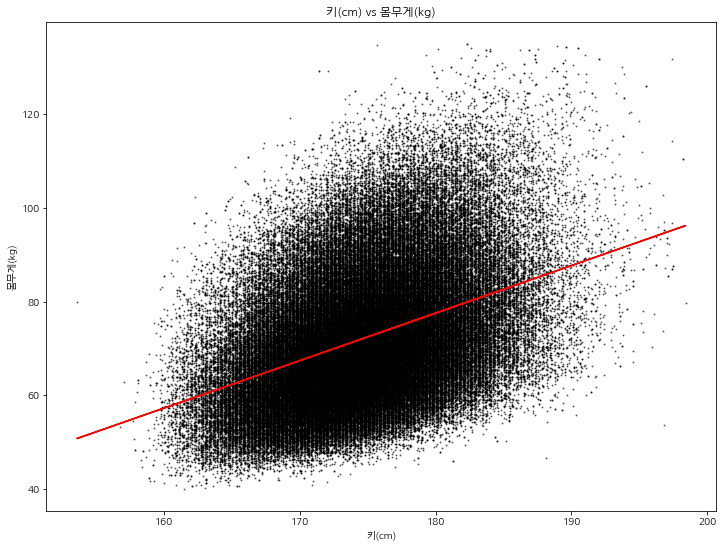

In [83]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,9))
plt.scatter(df['신장 센티미터'], df['몸무게 킬로그램'], s = 1, alpha = 0.5, c = 'k')
plt.plot(df['신장 센티미터'], reg.predict(np.array(df['신장 센티미터']).reshape(-1,1)), c= 'r')
plt.xlabel('키(cm)')
plt.ylabel('몸무게(kg)')
plt.title('키(cm) vs 몸무게(kg)')
plt.show()

# 마찬가지로 발길이와 신장의 관계를 시각화하자. 

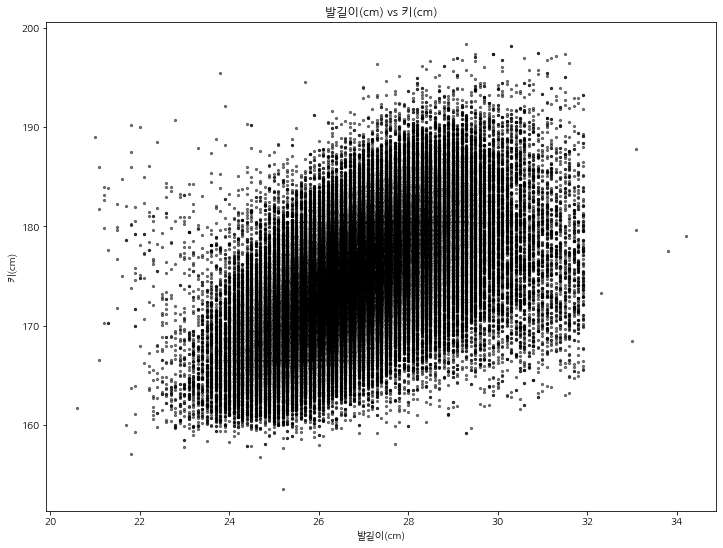

In [86]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,9))
plt.scatter(df['발 길이 센티미터'], df['신장 센티미터'], s = 5, alpha = 0.5, c = 'k')
plt.xlabel('발길이(cm)')
plt.ylabel('키(cm)')
plt.title('발길이(cm) vs 키(cm)')
plt.show()

In [87]:
import numpy as np

X = np.array(df[['발 길이 센티미터']]) #발 길이 센티미터 열을 array로 전환
Y = np.array(df[['신장 센티미터']]) #신장 센티미터 열을 array로 전환

print(X.shape, Y.shape)

(167952, 1) (167952, 1)


In [88]:
from sklearn.linear_model import LinearRegression

length = 27

X = X.reshape([-1,1])
reg = LinearRegression().fit(X,Y) # X와 Y의 관계를 선형식으로 나타내기 위하여 선형회귀를 진행합니다.
print(reg.score(X,Y)) # r^2 점수를 구하는 메서드
print(reg.coef_, reg.intercept_) # 기울기와 y절편을 출력합니다. 
reg.predict(np.array([[length]])) # 27cm일때의 예측 신장 출력합니다. 

0.297268422022932
[[2.12862116]] [117.57122578]


array([[175.04399712]])

In [89]:
height = int(input('발길이를 입력하세요(cm)'))

print(f'당신의 키는 {reg.predict(np.array([[height]]))[0,0]:.2f}cm 입니다!!')

발길이를 입력하세요(cm) 26


당신의 키는 172.92cm 입니다!!


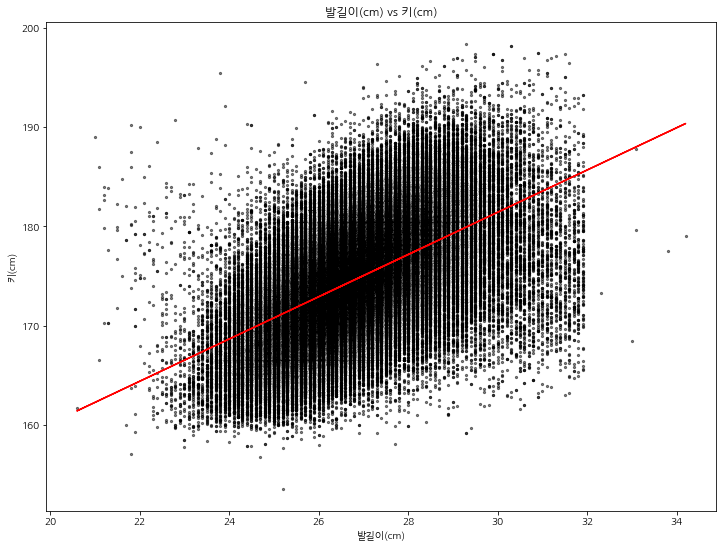

In [91]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,9))
plt.scatter(df['발 길이 센티미터'], df['신장 센티미터'], s = 5, alpha = 0.5, c = 'k')
plt.plot(df['발 길이 센티미터'], reg.predict(np.array(df['발 길이 센티미터']).reshape(-1,1)), c= 'r')
plt.xlabel('발길이(cm)')
plt.ylabel('키(cm)')
plt.title('발길이(cm) vs 키(cm)')
plt.show()